In [ ]:
from google.colab import drive
import os

drive.mount('/content/gdrive/')
os.environ['KAGGLE_CONFIG_DIR'] = '/content/gdrive/My Drive/Kaggle'
zipfile = 'hourly-energy-consumption.zip'
extfile = 'time_seriesSubmissioPowerPlant'

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


In [ ]:
!kaggle datasets download -d robikscube/hourly-energy-consumption

hourly-energy-consumption.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
ls

 CategoryModel_3ClassTwiter.h5
 CategoryModel_5Class.h5
 CategoryModel.h5
 daily-climate-time-series-data.zip
 dataset/
 datasetCategory/
 hourly-energy-consumption.zip
 imdb/
 imdb-synopsis-indonesian-movies.zip
 kaggle.json
 news-category-dataset.zip
 time_series/
'TimeSeriesmodel(Stock).h5'
 time_seriesSubmission/
 time_seriesSubmissionStock/
 trainingLog
 trainingLog.csv
 trainingSubmissionTimeSeriesLog.csv
 trainingTwiterLog.csv
 twiterredditsentimentanalyis/
 twitter-and-reddit-sentimental-analysis-dataset.zip
 us-historical-stock-prices-with-earnings-data.zip
 vehicle-data-set.zip
 VehicleModel.h5


In [ ]:
import zipfile as zf

try:
  extFile = zf.ZipFile(zipfile)
  extFile.extractall(extfile)
  extFile.close()
  print('extraksi dataset selesai')
except(FileExistsError,FileNotFoundError):
  print('Dataset tidak ditemukan')
except:
  print('terjadi kesalahan')
finally:
  print('operation terminated')

extraksi dataset selesai
operation terminated


In [ ]:
os.listdir(extfile)

['AEP_hourly.csv',
 'COMED_hourly.csv',
 'DAYTON_hourly.csv',
 'DEOK_hourly.csv',
 'DOM_hourly.csv',
 'DUQ_hourly.csv',
 'EKPC_hourly.csv',
 'FE_hourly.csv',
 'NI_hourly.csv',
 'PJME_hourly.csv',
 'PJMW_hourly.csv',
 'PJM_Load_hourly.csv',
 'est_hourly.paruqet',
 'pjm_hourly_est.csv']

In [ ]:
dir = os.listdir(extfile)
datasetdir1 = os.path.join(extfile,dir[9])
datasetdir2 = os.path.join(extfile,dir[11])

print('Power Plan one directory: {}'.format(datasetdir1))
print('Power Plan two directory: {}'.format(datasetdir2))

Power Plan one directory: time_seriesSubmissioPowerPlant/PJME_hourly.csv
Power Plan two directory: time_seriesSubmissioPowerPlant/PJM_Load_hourly.csv


In [ ]:
import pandas as pd

loadData_one = pd.read_csv(datasetdir1,parse_dates=['Datetime'])
loadData_two = pd.read_csv(datasetdir2,parse_dates=['Datetime'])

In [ ]:
loadData_one.head()

,Datetime,PJME_MW
0,2002-12-31 01:00:00,26498.0
1,2002-12-31 02:00:00,25147.0
2,2002-12-31 03:00:00,24574.0
3,2002-12-31 04:00:00,24393.0
4,2002-12-31 05:00:00,24860.0


In [ ]:
loadData_two.head()

,Datetime,PJM_Load_MW
0,1998-12-31 01:00:00,29309.0
1,1998-12-31 02:00:00,28236.0
2,1998-12-31 03:00:00,27692.0
3,1998-12-31 04:00:00,27596.0
4,1998-12-31 05:00:00,27888.0


In [ ]:
loadData_one.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145366 entries, 0 to 145365
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   Datetime  145366 non-null  datetime64[ns]
 1   PJME_MW   145366 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.2 MB


In [ ]:
loadData_two.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32896 entries, 0 to 32895
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Datetime     32896 non-null  datetime64[ns]
 1   PJM_Load_MW  32896 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 514.1 KB


In [ ]:
loadData_one.isnull().sum()

Datetime    0
PJME_MW     0
dtype: int64

In [ ]:
loadData_two.isnull().sum()

Datetime       0
PJM_Load_MW    0
dtype: int64

In [ ]:
powerplan1 = loadData_two.rename(columns={'Datetime':'datetime','PJM_Load_MW':'pjm_mw'})
powerplan2 = loadData_one.rename(columns={'Datetime':'datetime','PJME_MW':'pjm_mw'})


normalizedata = pd.concat([powerplan1,powerplan2],ignore_index=True)
powerplantqty = len(normalizedata)
print('banyak dataset: {}'.format(powerplantqty))
normalizedata.head(10)

banyak dataset: 178262


,datetime,pjm_mw
0,1998-12-31 01:00:00,29309.0
1,1998-12-31 02:00:00,28236.0
2,1998-12-31 03:00:00,27692.0
3,1998-12-31 04:00:00,27596.0
4,1998-12-31 05:00:00,27888.0
5,1998-12-31 06:00:00,29382.0
6,1998-12-31 07:00:00,31373.0
7,1998-12-31 08:00:00,33272.0
8,1998-12-31 09:00:00,34133.0
9,1998-12-31 10:00:00,35232.0


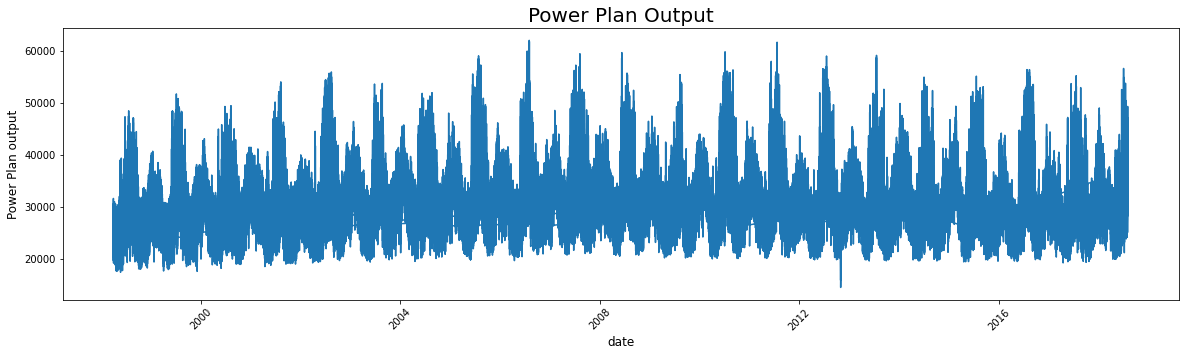

In [ ]:
import matplotlib.pyplot as plt

datetime = normalizedata.datetime.values
output = normalizedata.pjm_mw.values
Title = 'Power Plan Output'

def plotting(Xaxes=[],Yaxes=[],title=''):
  plt.figure(figsize=(20,5))
  plt.plot(Xaxes,Yaxes)
  plt.xticks(rotation=45)
  plt.title(title,fontsize=20)
  plt.xlabel('date',fontsize=12)
  plt.ylabel('Power Plan output',fontsize=12)
  plt.show()  

plotting(datetime,output,Title)


In [ ]:
normalizedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178262 entries, 0 to 178261
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   datetime  178262 non-null  datetime64[ns]
 1   pjm_mw    178262 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.7 MB


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import datetime

data = normalizedata.values

timePowerPlant = []
PowerOutput = []

for i in range(len(data)):
  timePowerPlant.append(data[i,0])
  PowerOutput.append(data[i,1])

timePowerPlant = pd.DataFrame({'datetime':timePowerPlant})
PowerOutput = pd.DataFrame({'pjm_mw':PowerOutput})

def normalize(normalData):
    """Normalize the DF using min/max"""
    scaler = MinMaxScaler(feature_range=(-1, 1))
    dates_scaled = scaler.fit_transform(normalData.values)
    return dates_scaled


time = normalize(timePowerPlant)
pwr = normalize(PowerOutput)  
timeFinal = []
pwrFinal = []
for i in range(len(time)):
  timeFinal.append(time[i,0])
  pwrFinal.append(pwr[i,0])

finalDataPowerPlant = pd.DataFrame({'datetime':timeFinal ,'pjm_kw':pwrFinal})

finalDataPowerPlant.head()

,datetime,pjm_kw
0,-0.926235,-0.377857
1,-0.926223,-0.423070
2,-0.926212,-0.445992
3,-0.926201,-0.450037
4,-0.926190,-0.437733


In [ ]:
from sklearn.model_selection import TimeSeriesSplit
import numpy as np

tscv = TimeSeriesSplit(n_splits=4)#20% validation
data = finalDataPowerPlant.values

for tr_index,val_index in tscv.split(finalDataPowerPlant):
  traindata,testdata = pd.DataFrame({'datetime':data[tr_index,0],'pjm_mw':data[tr_index,1]}) , pd.DataFrame({'datetime':data[val_index,0],'pjm_mw':data[val_index,1]})  
n_steps = 1
n_feature = 1

date_train = traindata.values
date_test = testdata.values

print('total dataset awal: {}'.format(len(normalizedata)))
print('train data qty: {}'.format(len(traindata)))
print('test data qty : {}'.format(len(testdata)))

total dataset awal: 178262
train data qty: 142610
test data qty : 35652


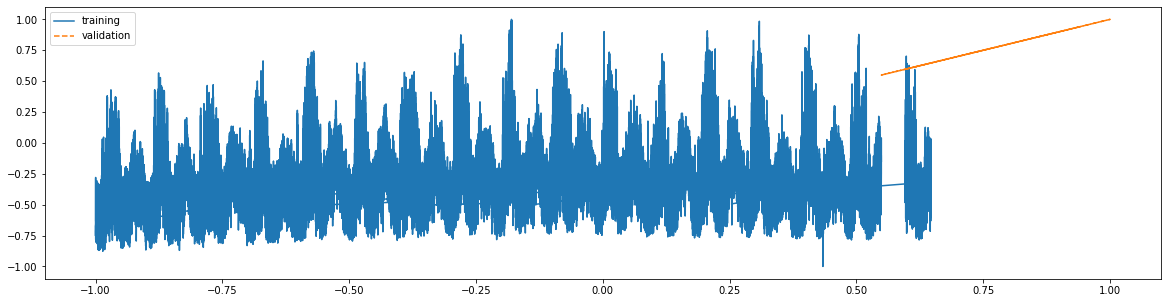

In [ ]:
datetimeT = traindata.datetime.values
powerT = traindata.pjm_mw.values
datetimeTs = testdata.datetime.values
powerTs = testdata.datetime

plt.figure(figsize=(20,5))
plt.plot(datetimeT,powerT,label='training')
plt.plot(datetimeTs,powerTs,linestyle='dashed',label='validation')
plt.legend()
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow import keras


def windowed_dataset(series,windows_size,batch_size,shuffle_buffer):
  series = tf.expand_dims(series,axis=-1)
  ds = tf.data.Dataset.from_tensor_slices(series)
  ds = ds.window(windows_size + 1, shift=1, drop_remainder=True)
  ds = ds.flat_map(lambda w: w.batch(windows_size + 1))
  ds = ds.shuffle(shuffle_buffer)
  ds = ds.map(lambda w: (w[:1], w[1:]))
  return ds.batch(batch_size).prefetch(1)

train_close_set = windowed_dataset(power_train,windows_size=60,batch_size=100,shuffle_buffer=1000)
test_close_set = windowed_dataset(power_test,windows_size=60,batch_size=100,shuffle_buffer=1000)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import Huber

model = Sequential()
model.add(Bidirectional(LSTM(1024,activation='relu',return_sequences=True),input_shape=(n_steps,n_feature)))
model.add(Bidirectional(LSTM(1024,activation='relu', return_sequences=True)))
model.add(Bidirectional(LSTM(512,activation='relu', return_sequences=True)))
model.add(Bidirectional(LSTM(120,activation='relu', return_sequences=True)))
model.add(Bidirectional(LSTM(60,activation='relu')))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

#optimizer = SGD(lr=1.000e-04,momentum=0.9)
#optimizer = Adam(lr=1.000e-04)
optimizer = Adam(lr=1.500e-04)
model.compile(
    loss = Huber(),
    optimizer = optimizer,
    metrics=['mae']
)

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_27 (Bidirectio (None, 1, 2048)           8404992   
_________________________________________________________________
bidirectional_28 (Bidirectio (None, 1, 2048)           25174016  
_________________________________________________________________
bidirectional_29 (Bidirectio (None, 1, 1024)           10489856  
_________________________________________________________________
bidirectional_30 (Bidirectio (None, 1, 240)            1099200   
_________________________________________________________________
bidirectional_31 (Bidirectio (None, 120)               144480    
_________________________________________________________________
flatten_5 (Flatten)          (None, 120)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 1024)             

In [ ]:
import tensorflow as tf
MAE_TRESHOLD = 0.10

class Callback(tf.keras.callbacks.Callback):
  def onE(self,epoch,logs={}):
    if(logs.get('mae') < MAE_TRESHOLD):
      print('{}% MAE\nEnd Training'.fromat(MAE_TRESHOLD*100))
      self.model.stop_training = True
     

callbackval = Callback()
saveLog =  tf.keras.callbacks.CSVLogger('trainingSubmissionTimeSeriesLog.csv',separator=',')

with tf.device('/device:GPU:0'):
  history = model.fit(
                    train_close_set,
                    epochs=30,
                    steps_per_epoch=100,
                    validation_steps=50,
                    batch_size=64,
                    validation_data = test_close_set,
                    callbacks = [callbackval,saveLog],
                    verbose=1
                    )

model.save('TimeSeriesmodel(PowerPlant).h5')

Epoch 1/30
100/100 [==============================] - 105s 1s/step - loss: 0.3909 - mae: 0.8493 - val_loss: 0.1826 - val_mae: 0.5599
Epoch 2/30
100/100 [==============================] - 104s 1s/step - loss: 0.0951 - mae: 0.3837 - val_loss: 0.0773 - val_mae: 0.3405
Epoch 3/30
100/100 [==============================] - 104s 1s/step - loss: 0.0937 - mae: 0.3844 - val_loss: 0.0774 - val_mae: 0.3402
Epoch 4/30
100/100 [==============================] - 105s 1s/step - loss: 0.0776 - mae: 0.3448 - val_loss: 0.0772 - val_mae: 0.3401
Epoch 5/30
100/100 [==============================] - 105s 1s/step - loss: 0.0719 - mae: 0.3275 - val_loss: 0.0775 - val_mae: 0.3409
Epoch 6/30
100/100 [==============================] - 104s 1s/step - loss: 0.0626 - mae: 0.2996 - val_loss: 0.0772 - val_mae: 0.3398
Epoch 7/30
100/100 [==============================] - 104s 1s/step - loss: 0.0670 - mae: 0.3150 - val_loss: 0.0771 - val_mae: 0.3398
Epoch 8/30
100/100 [==============================] - 104s 1s/step - 

 26/100 [======>.......................] - 33s 1s/step - loss: 0.0725 - mae: 0.3264 - val_loss: 0.0772 - val_mae: 0.3401


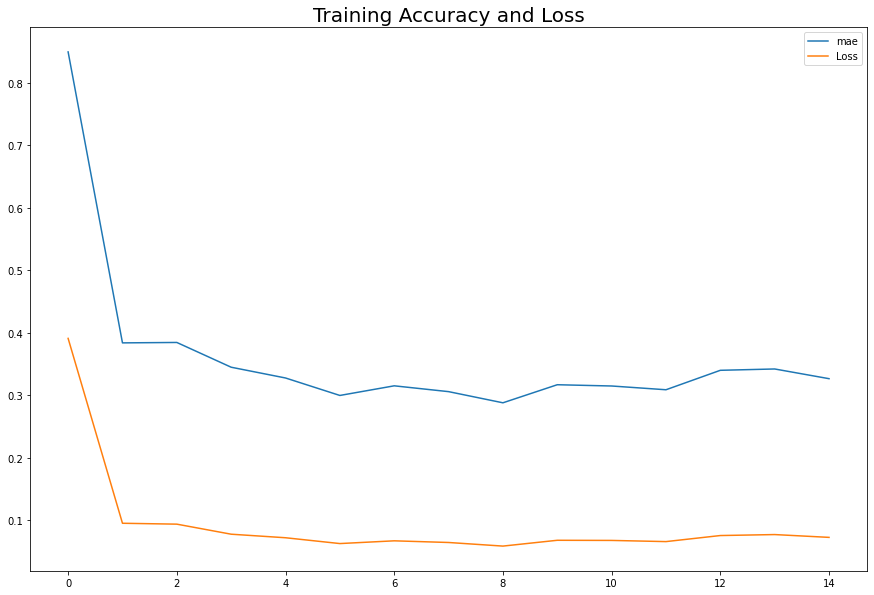

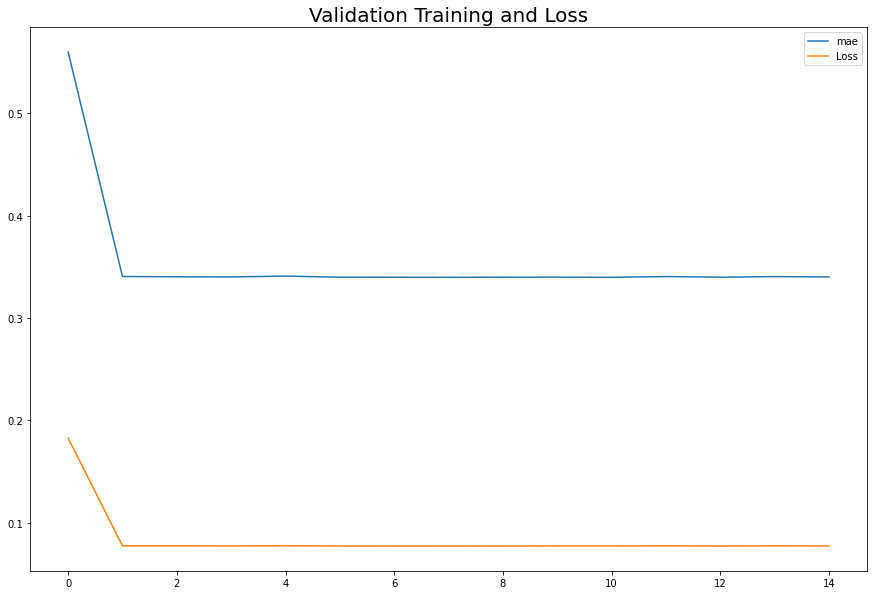

In [ ]:
mae = history.history['mae']
loss = history.history['loss']
epoch = range(len(mae))
val_mae = history.history['val_mae']
val_loss = history.history['val_loss']


def Trainplotting(Xaxes=[],Yaxes=[],Yval =[],title=''):
  plt.figure(figsize=(15,10))
  plt.plot(Xaxes,Yaxes,label='mae')
  plt.plot(Xaxes, Yval,label='Loss')
  plt.legend()
  plt.title(title,fontsize=20)
  plt.show()
 
Trainplotting(epoch,mae,loss,title='Training Accuracy and Loss')
print('\n\n')
Trainplotting(epoch,val_mae,val_loss,title='Validation Training and Loss')